### SVM

#### Here I have imported necessary libraries for data manipulation, visualization, and machine learning with scikit-learn for Support Vector Machine (SVM) classification with data split, evaluation metrics, feature scaling and hyperparameter tuning and considered setting a random seed for reproducibility in order to obtain consistent results when randomness is involved

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

np.random.seed(1)

#### Generated a sample dataframe with sample size of 25 rows, 'Experience in Years' values ranges from 0 to 15, and 'No.of Skills' values ranges from 1 to 12.

In [7]:
sample_size = 25
min_work_exp = 0
max_work_exp = 15
skills_min = 1
skills_max = 12

df = pd.DataFrame({'Experience in Years': np.linspace(min_work_exp,max_work_exp,sample_size).astype(float),'No.of Skills': np.linspace(skills_min,skills_max,sample_size).astype(int)})
df

,Experience in Years,No.of Skills
0,0.000,1
1,0.625,1
2,1.250,1
3,1.875,2
4,2.500,2
5,3.125,3
6,3.750,3
7,4.375,4
8,5.000,4
9,5.625,5


In [8]:
df['Selected for Interview'] = ((df['Experience in Years'] > 7) |  (df['No.of Skills'] > 5)).astype(int)
df

,Experience in Years,No.of Skills,Selected for Interview
0,0.000,1,0
1,0.625,1,0
2,1.250,1,0
3,1.875,2,0
4,2.500,2,0
5,3.125,3,0
6,3.750,3,0
7,4.375,4,0
8,5.000,4,0
9,5.625,5,0


#### Introducing random noise to the 'No.of Skills' column in the DataFrame to simulate variability. aiming to ensure that the data reflects some degree of randomness, to enhance the practicality of the dataset.

In [9]:
df['No.of Skills'] = df['No.of Skills'] + np.random.uniform(-25,25, sample_size)

#### Plotting a scatter plot to understand the relationship between 'Experience in Years' and 'No.of Skills' with color-coded points on label 'Selected for Interview'.

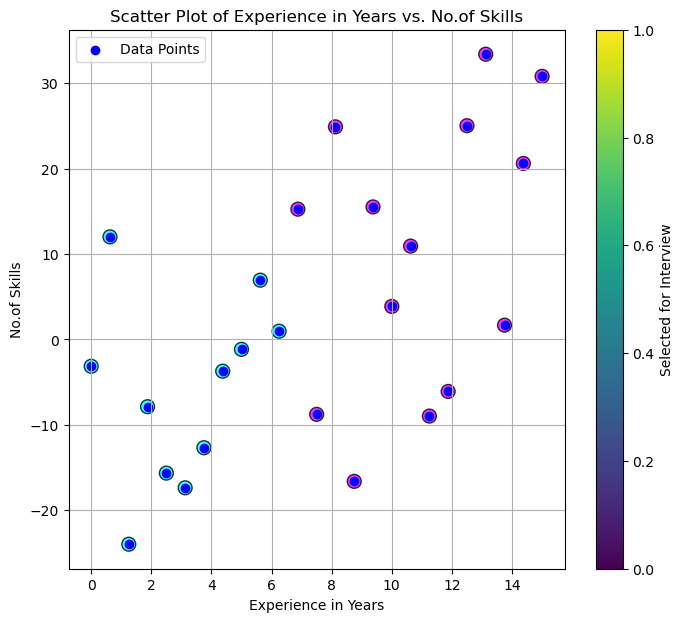

In [14]:
plt.figure(figsize=(8, 7))
plt.scatter(df['Experience in Years'], df['No.of Skills'], c=df['Selected for Interview'], cmap='cool', edgecolors='k', alpha=0.8, s=100)
plt.scatter(df['Experience in Years'], df['No.of Skills'], c='blue', marker='o', label='Data Points')
plt.colorbar(label='Selected for Interview')
plt.title('Scatter Plot of Experience in Years vs. No.of Skills')
plt.xlabel('Experience in Years')
plt.ylabel('No.of Skills')
plt.legend()
plt.grid(True)
plt.show()

#### Here the dataframe 'df' has been saved to a CSV file named as 'selected_for_interview.csv' where index is not included.

In [15]:
df.to_csv('selected_for_interview.csv', index=False)

### Train and Split Data

In [16]:
# Use sklearn to split df into a training set and a test set

X = df.iloc[:,:2]
y = df['Selected for Interview']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)


### Modeling the Data

In [17]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": [], "F2": [], "Parameters": []})

In [18]:
# generate a fbeta 2 scorer
from sklearn.metrics import make_scorer
from sklearn.metrics import fbeta_score
f2_scorer = make_scorer(fbeta_score, beta=2)

### 3.1 Fit a SVM classification model using linear kernal


In [19]:
# defining parameter range 
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],  
              'kernel': ['linear']}
  

grid = GridSearchCV(SVC(), param_grid, scoring=f2_scorer, refit = True, verbose = 3, n_jobs=-1) 
  
# fitting the model for grid search 
_ = grid.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


#### aiming to observe the best parameter by printting them after tuning, SVM model is tuned and then predicted the test set data. Also, calculated the performance metrics in order to evaluate

In [20]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

y_pred = grid.predict(X_test) 

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

performance = pd.concat([performance, pd.DataFrame({"model": ["SVM Linear"], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1], "F2": [f2], "Parameters": [grid.best_params_]})])


{'C': 0.01, 'kernel': 'linear'}
SVC(C=0.01, kernel='linear')


### 3.2 Fit a SVM classification model using rbf kernal

In [21]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}
  
grid = GridSearchCV(SVC(), param_grid, scoring=f2_scorer, refit = True, verbose = 3, n_jobs=-1) 
  
_ = grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


#### aiming to observe the best parameters by printing them after tuning. After hyperparameter tuning, evaluated and stored the performance metrics of SVM(RBF Kernel).

In [22]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

y_pred = grid.predict(X_test) 

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

performance = pd.concat([performance, pd.DataFrame({"model": ["SVM rbf"], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1], "F2": [f2],"Parameters": [grid.best_params_]})])

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, gamma=0.1)


### 3.3 Fit a SVM classification model using polynomial kernal

In [23]:
# defining parameter range 
param_grid = {'C': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],  
              'coef0': [0.01, 0.1, 0.5, 1, 5, 10, 50, 100],
              'kernel': ['poly']}
  
grid = GridSearchCV(SVC(), param_grid, scoring=f2_scorer, refit = True, verbose = 3, n_jobs=-1) 
  
# fitting the model for grid search 
_ = grid.fit(X_train, y_train)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


#### Here the best paramters are printed, tuned the model, evaluated the performance metrics and finally appended the results to the dataframe.

In [24]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_)

y_pred = grid.predict(X_test) 

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

performance = pd.concat([performance, pd.DataFrame({"model": ["SVM Poly"], "Accuracy": [accuracy], "Precision": [precision], "Recall": [recall], "F1": [f1], "F2": [f2], "Parameters": [grid.best_params_]})])

{'C': 0.01, 'coef0': 10, 'kernel': 'poly'}
SVC(C=0.01, coef0=10, kernel='poly')


## 4.0 Summary

#### Here the 'performance' dataframe is been sorted by the F2 column in descending order

In [25]:
performance.sort_values(by="F2", ascending=False)

,model,Accuracy,Precision,Recall,F1,F2,Parameters
0,SVM rbf,0.9,0.857143,1.000000,0.923077,0.967742,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"
0,SVM Poly,0.9,1.000000,0.833333,0.909091,0.862069,"{'C': 0.01, 'coef0': 10, 'kernel': 'poly'}"
0,SVM Linear,0.8,1.000000,0.666667,0.800000,0.714286,"{'C': 0.01, 'kernel': 'linear'}"


#### To conclude, with the three SVM models that are evaluated, the RBF kernel has achieved the highest accuracy (90%) and demonstrated excellent recall (100%). The Polynomial kernel, despite its high precision (100%), had slightly lower overall performance. The Linear kernel, while maintaining a precision of 100%, showed a lower accuracy (80%) and moderate recall (66.67%). The choice of the RBF kernel with parameters {'C': 1, 'gamma': 0.1} appears to be the most balanced for this classification task